# Metaschemas are graphs, graphs are metaschemas

That is a very poetic title, but what does it in fact mean? If we read [the current official documentation for Metaschema's specification](https://pages.nist.gov/metaschema/specification/information-modeling/), we see that Metaschema models are a special kind of graph.

> In a Metaschema module, an information model is represented as a cyclic directed multigraph.

So what does that mean? How can we visualize the graph data structure of a model? How about how the model is related to its document instance? What does this mean for parsing: must you always parse and process a Metaschema document instance in lock step with its corresponding model?

These are all great questions, let's explore them below. But first, we need to perform a little housekeeping.

## Prerequisites

If you are viewing this article, and you are not aware yet, the content and code are integrated into [a Jupyter notebook](https://docs.jupyter.org/en/latest/#what-is-a-notebook). If you are not familiar, the Jupyter Project, and its linked documentation in the previous sentence, explain useful background here. There are a few ways to run this. You do not have to just follow along, regardless of which way you choose. The beauty of this article, these narrative parts and the code, is you can run your own copy with either method and adapt the content (if you do not like my wording) and, most importantly, try the code for yourself and change things.

If you are less familiar with system administration and these data science tools, I recommend using the [MyBinder](https://mybinder.org/) or [Google Collab]() service to load this notebook from GitHub and run your copy and explore. To do that, you will be asked for [the full URL to this published notebook, beginning with `https://...`].

Alternatively, if you enjoy locally running your free or open-source software on your own computers and would rather not use these cloud services, you can run the following steps with `git` to locally clone the repository and use `docker` to run a container instance with the JupyterLab image and have an almost identical local experience.

1. `git clone https://github.com/xee5ch/metaschema_experiments.git`
1. `cd metaschema_experiments/visualizations`
1. `docker run --rm -p 8889:8888 -v $(pwd):/home/jovyan/work quay.io/jupyter/base-notebook start-notebook.py --NotebookApp.token='BE_ORIGINAL_AND_SECURITY-MINDED_REPLACE_ME!'`

Regardless of the strategy above, cloud-based or local, at this point you can run the shell command in the next cell, beginning with `!pip` to say run the `pip` executable on the shell and not native Python code. This command install the dependencies needed where you are running this Jupyter notebook.

Once you have done that, you are ready to go and start exploring!

In [ ]:
!pip install -r requirements.txt

## Importing libraries and organizing the code

First, we need to import the necessary libraries. Let's import [NetworkX](https://networkx.org/) for constructing the graph datastructure (to start with the model, later with document instances). Additionally, we will use [matplotlib](https://matplotlib.org/) to visualize the resulting graph data structure.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

With those libraries imported, we can import a list of pairs that represent the graph.

In [6]:
G = nx.DiGraph(
    [
        ("f", "a"),
        ("a", "b"),
        ("a", "e"),
        ("b", "c"),
        ("b", "d"),
        ("d", "e"),
        ("f", "c"),
        ("f", "g"),
        ("h", "f"),
    ]
)

Now that we have created the graph data, bound to variable `G` (for graph of course), we can take this directed graph (in the case of the NetworkX library, the library developers provide the `DiGraph` class for this very purpose) and visualize it with matplotlib.

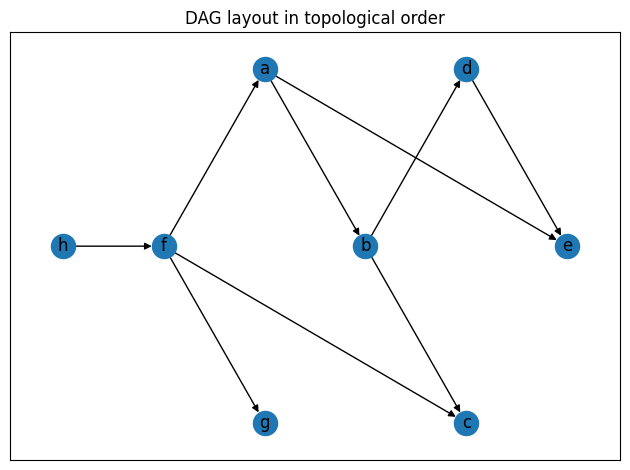

In [8]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

And there you have it, your first directed graph in its topological order.